In [1]:
import cv2            # Libraries that we would be using in the project
import matplotlib.pyplot as plt      
import numpy as np

In [2]:
gender_dataset= cv2.dnn.readNetFromCaffe("gender.prototxt","gender.caffemodel")

gender.prototxt is my gender model structure and gender.caffemodel is the pretrained weights of the gender model.

In [3]:
age_dataset = cv2.dnn.readNetFromCaffe("age.prototxt","dex_chalearn_iccv2015.caffemodel")

age.prototxt is my age model structure and dex_chalearn_iccv2015 is the pretrained weights of the age model.

In [4]:
pic = cv2.imread("./images/IMG20201202210659.jpg") #Read the image to make age and gender prediction

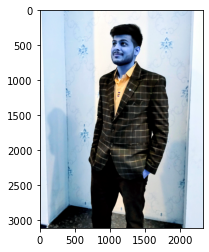

In [5]:
plt.imshow(pic) # I have uploaded my photo

Here, the image is in blue because opencv reads an image in the reverse direction of the RGB.

Various color spaces such as RGB, BGR, HSV can be mutually converted using OpenCV function cvtColor().

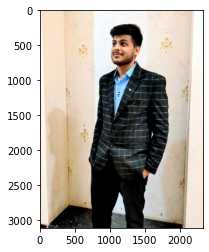

In [6]:
im_rgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB) #Convert BGR to RGB
plt.imshow(im_rgb)

Here, we only need to focus on the just facial area of the image. Luckily, openCV provides a face detector. Detector path is in my environment is here.

Here, face_cascade is the detector and detector path is in parenthesis

In [7]:
face_cascade= cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

#Finding faces in the image. Here, 1.1 is scaleFactor & 3= minNeighbors=3 , pic = pic we have uploaded

In [8]:
faces = face_cascade.detectMultiScale(pic,1.1,3) 
faces

array([[911, 313, 422, 422]], dtype=int32)

Co-ordinates of the detected face image : 911,313,422,422

In [9]:
x,y,w,h = faces[0] #Store the coordinates in x,y,w & h parameters and let's get the zero index value of the faces variable

In [10]:
detected_face = pic[int(y) : int(y+h) , int(x) : int(x+w)]

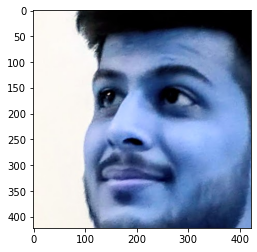

In [11]:
plt.imshow(detected_face) #plotting the detected face

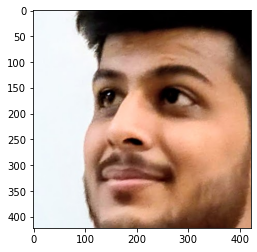

In [12]:
plt.imshow( cv2.cvtColor(detected_face, cv2.COLOR_BGR2RGB)) #Converting the image from BGR to RGB

Notice that, the both age and gender prediction models are based on VGG model and its expected size is 224 times 224.

In [13]:
detected_face = cv2.resize(detected_face,(224,224)) #Let's resize the detected face

In [14]:
detected_face.shape #Now, we confirm the shape of the detected face
#But caffe model expects the input size in the reverse direction

(224, 224, 3)

In [15]:
#Handling the expected input shape of the caffe model
detected_face_blob = cv2.dnn.blobFromImage(detected_face)

In [16]:
detected_face_blob.shape #same as expected input size ; input is ready and we can pass this input to the pretrained models.

(1, 3, 224, 224)

In [17]:
age_dataset.setInput(detected_face_blob) 
age_result = age_dataset.forward()

gender_dataset.setInput(detected_face_blob)
gender_result = gender_dataset.forward()

In [18]:
gender_result #It returns an array consisting of two items if the maximum one is the first one, then it's going to be a woman; 
#and if the maximum one is the second part then it's going to be a man
# Therefore, we have imported numpy

array([[0.00462393, 0.995376  ]], dtype=float32)

In [19]:
if np.argmax(gender_result[0]) == 0 :
    print("woman")
else :
    print ("man")

man


In [20]:
len(age_result[0]) #it returns 101 shaped array 

101

In [21]:
age_result[0] # Values of those array

array([1.5350102e-05, 1.2926396e-04, 4.2840697e-05, 5.0864150e-05,
       9.2140734e-05, 9.1370509e-04, 8.4954919e-04, 1.5090472e-03,
       3.0459631e-03, 2.9313392e-03, 2.2233590e-03, 1.4700251e-02,
       1.3681359e-02, 2.5114235e-02, 9.5505700e-02, 8.4038198e-02,
       2.5752819e-01, 1.5153572e-01, 1.3432135e-01, 7.4950367e-02,
       5.1538184e-02, 2.6088245e-02, 3.2753617e-02, 7.0130317e-03,
       3.7819115e-03, 4.2944350e-03, 6.4010610e-04, 2.1794364e-03,
       5.5613427e-04, 4.7989300e-04, 2.8926018e-04, 2.9371580e-04,
       1.8361327e-04, 2.1624954e-04, 3.5899828e-04, 1.1966130e-04,
       1.0629254e-04, 2.2456284e-04, 2.2082447e-04, 1.3166900e-04,
       1.8324993e-04, 3.4624388e-04, 1.0868671e-04, 1.3884675e-04,
       7.9288706e-04, 1.9377722e-04, 2.0370181e-04, 1.7045598e-04,
       2.5511926e-04, 1.5568729e-04, 2.3284063e-04, 1.8368360e-04,
       3.1874736e-04, 1.9190715e-04, 1.4025538e-04, 1.2633301e-04,
       3.0440185e-04, 1.0238425e-04, 5.7624544e-05, 1.1215246e

In the reference study, it's expected to multiply the value of each item to its index

In [22]:
indexes=np.array([i for i in range(0,101)]) #Handling the multiplication operation and storing it in numpy array, those are the indexes

In [23]:
np.sum(age_result[0] * indexes) #Multiplying each result at indexes then apply numpy sum function here

16.997547877415286

In [24]:
apparent_age = round(np.sum(age_result[0] * indexes)) #Apparent Image

In [25]:
d= apparent_age, "years old"

In [26]:
print(d)

(17, 'years old')


Since, the uploaded picture is mine and my age when it was captured was 18 years. 

Actual Age= 18 ; Predicted Age = 17

Therefore, we can say that the model has a good Accuracy.